# Question 1

The way classification models work is by beginning with a root node where we give it a splitting feature (such as a category or threshold) and we begin to split the data based on this criteria. After we split the data, we will eventually get into nodes called leafs, in which the model will predict a certain quality or category based off our tree. This is different than a linear regression model where, we give it a certain criteria to predict a numerical, continuous value rather than a label or classification.

# Question 2

For the accuracy measure, a good example would be predicting the weather. For example if we wanted to predict whether or not it would snow, we would create a classification model where we feed it data to predict snow days, we can calculate the possible outcomes (false positives, false negatives, etc.) and then through these metrics we can calculate accuracy by seeing how many times the model predict true positives and negatives and divide it by the total amount of predictions.

For the sensitivity measure, a good example would be if we predict illnesses using a model, where we give it data to predict a certain outcome and then calculate whether or not the model can predict a true positive relative to true positives and true negatives, showing us how effective the model can be. For the specifivity measure, it works the same way as the sensitivity measure but in regards to true negatives, allowing us to see how "specific" our data can get when it comes to deciding categories for each observation.

For the precision measure, a good example would be spam filters, in which giving our model a certain amount of data, it has to block the spam emails while allowing the non-spam emails to pass through. For the model to be able to do this it has to be "precise" and see how "effective" it would be by comparing true positives to true negatives + true positives.

# Question 4

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop 'weight', 'width', and 'height' columns
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab = ab.dropna()

# Convert 'Pub year' and 'NumPages' to int
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to categorical type
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Check the dataframe after processing
print(ab.dtypes)
print(ab.head())

Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Pub

Accuracy: 0.84375
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.91      0.89        44
        True       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64



[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]'),
 Text(0.75, 0.5, 'x[0] <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]')]

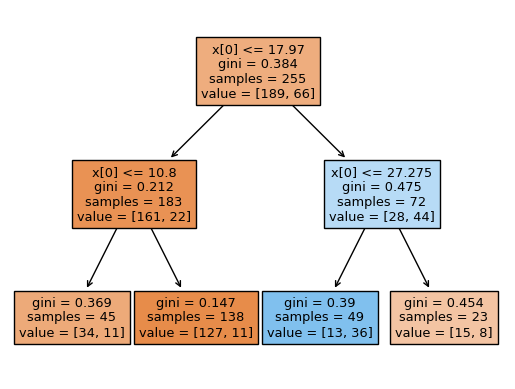

In [11]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop 'weight', 'width', and 'height' columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Convert 'Pub year' and 'NumPages' to int
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Now you can define the target and features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Define target and features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Visualize the decision tree
tree.plot_tree(clf, filled=True)

The model predicts based on our data that if the price of a book is less than 10.8, it predicts that a majority of the samples will be hardcover books, while our other branch will predicts that it will be majority paperback. It then further splits into another 2 categories under each node to show how our other variables, such as number of pages and publication year further categorizes our data into leafs for prediction.

# Question 6

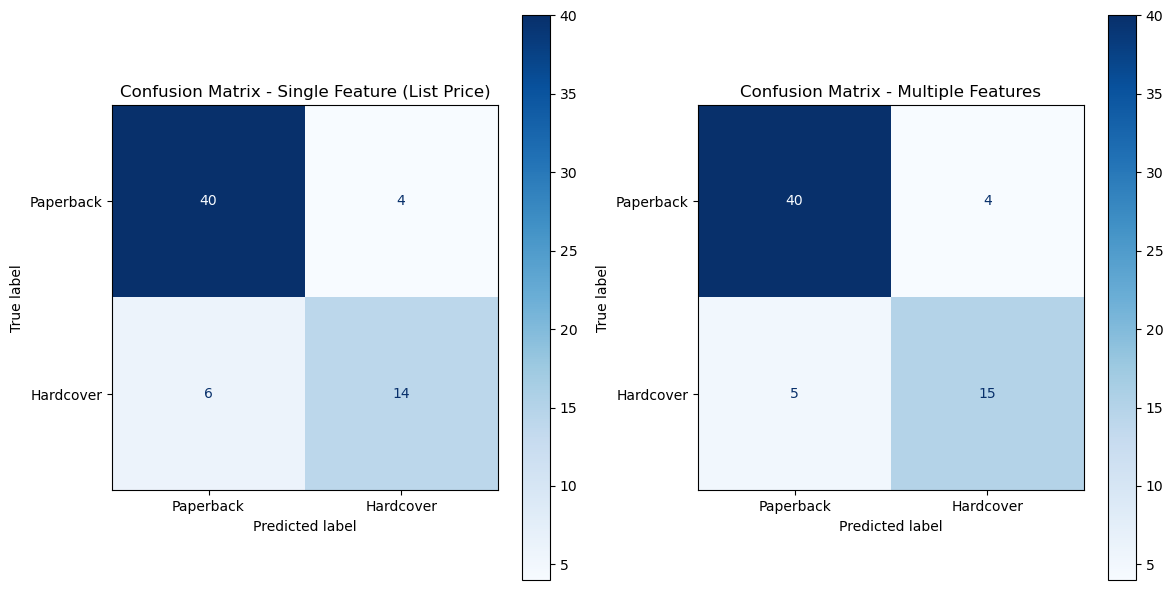

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset (ensure you've defined ab_reduced_noNaN already)
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the dataset (drop columns, set types, handle NaN, etc.)
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height']).dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Create the target variable (y) and feature sets (X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X_single = ab_reduced_noNaN[['List Price']]
X_multiple = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Split the data into 80% training and 20% testing for both models
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
X_train_multiple, X_test_multiple, _, _ = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create the decision tree model for the 'List Price' feature
tree_single = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_single.fit(X_train_single, y_train)

# Predict with the model
y_pred_single = tree_single.predict(X_test_single)

# Create the decision tree model for the multiple features
tree_multiple = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_multiple.fit(X_train_multiple, y_train)

# Predict with the model
y_pred_multiple = tree_multiple.predict(X_test_multiple)

# Generate confusion matrices
cm_single = confusion_matrix(y_test, y_pred_single)
cm_multiple = confusion_matrix(y_test, y_pred_multiple)

# Display the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix=cm_single, display_labels=['Paperback', 'Hardcover']).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Single Feature (List Price)')

ConfusionMatrixDisplay(confusion_matrix=cm_multiple, display_labels=['Paperback', 'Hardcover']).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix - Multiple Features')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'ab_reduced_noNaN' is already preprocessed

# Define target and features for both models
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X_single = ab_reduced_noNaN[['List Price']]
X_multiple = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Split data into 80% training and 20% testing
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
X_train_multiple, X_test_multiple, _, _ = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create and train the decision tree models
tree_single = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_single.fit(X_train_single, y_train)
y_pred_single = tree_single.predict(X_test_single)

tree_multiple = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_multiple.fit(X_train_multiple, y_train)
y_pred_multiple = tree_multiple.predict(X_test_multiple)

# Create confusion matrices
cm_single = confusion_matrix(y_test, y_pred_single)
cm_multiple = confusion_matrix(y_test, y_pred_multiple)

# Calculate metrics for the model with List Price (single feature)
accuracy_single = accuracy_score(y_test, y_pred_single)
precision_single = precision_score(y_test, y_pred_single)
recall_single = recall_score(y_test, y_pred_single)
specificity_single = cm_single[0, 0] / (cm_single[0, 0] + cm_single[0, 1])  # True Negative rate
f1_single = f1_score(y_test, y_pred_single)

# Calculate metrics for the model with NumPages, Thick, and List Price (multiple features)
accuracy_multiple = accuracy_score(y_test, y_pred_multiple)
precision_multiple = precision_score(y_test, y_pred_multiple)
recall_multiple = recall_score(y_test, y_pred_multiple)
specificity_multiple = cm_multiple[0, 0] / (cm_multiple[0, 0] + cm_multiple[0, 1])  # True Negative rate
f1_multiple = f1_score(y_test, y_pred_multiple)

# Print metrics for both models
print(f"Metrics for the model with List Price (Single Feature):")
print(f"Accuracy: {accuracy_single:.4f}")
print(f"Precision: {precision_single:.4f}")
print(f"Recall: {recall_single:.4f}")
print(f"Specificity: {specificity_single:.4f}")
print(f"F1-Score: {f1_single:.4f}")

print("\nMetrics for the model with NumPages, Thick, and List Price (Multiple Features):")
print(f"Accuracy: {accuracy_multiple:.4f}")
print(f"Precision: {precision_multiple:.4f}")
print(f"Recall: {recall_multiple:.4f}")
print(f"Specificity: {specificity_multiple:.4f}")
print(f"F1-Score: {f1_multiple:.4f}")


Metrics for the model with List Price (Single Feature):
Accuracy: 0.8438
Precision: 0.7778
Recall: 0.7000
Specificity: 0.9091
F1-Score: 0.7368

Metrics for the model with NumPages, Thick, and List Price (Multiple Features):
Accuracy: 0.8594
Precision: 0.7895
Recall: 0.7500
Specificity: 0.9091
F1-Score: 0.7692


# Question 7

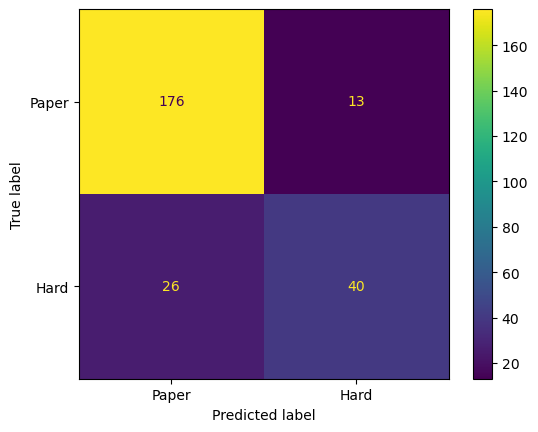

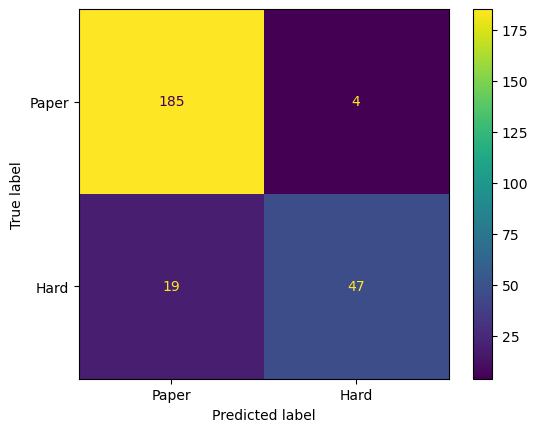

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Assuming 'ab_reduced_noNaN' is already preprocessed
# Define target and features
X_single = ab_reduced_noNaN[['List Price']]
X_multiple = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable: Hardcover (1) or Paper (0)

# Split the data into training and test sets
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
X_train_multiple, X_test_multiple, _, _ = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create and train the decision tree models
clf_single = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_single.fit(X_train_single, y_train)

clf_multiple = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_multiple.fit(X_train_multiple, y_train)

# Plot confusion matrix for the model with 'List Price' only
cm_single = confusion_matrix(y_train, clf_single.predict(X_train_single))
ConfusionMatrixDisplay(confusion_matrix=cm_single, display_labels=["Paper", "Hard"]).plot()

# Plot confusion matrix for the model with 'NumPages', 'Thick', and 'List Price'
cm_multiple = confusion_matrix(y_train, clf_multiple.predict(X_train_multiple))
ConfusionMatrixDisplay(confusion_matrix=cm_multiple, display_labels=["Paper", "Hard"]).plot()


This model is using only a variable to predict multiple compared to our earlier model where we used multiple variables to predict a singular one. We can see this in the confusion matrix as well as we have higher cases of false negatives and positives than we did above. Another indicator that our model is better, is in our original one, we used more variables to predict our outcome, meaning we used more data, making our models far more accurate than these ones.

Chatgpt Logs: https://chatgpt.com/share/674002eb-1c0c-8007-8752-339dba466228